# 美しい地図を作りましょう

<img src="images/better maps.png">

matplotlib を使用してマップを作成する方法を学習しました。 このラボでは、マップ フィーチャの変更、ベースマップの追加、タイトルの作成などにより、これらのマップをさらに磨き上げる方法を学びます。

*注意

matplotlib には日本語フォント表示に関する問題があります。 Mac と PC のどちらを使用しているかに応じて、以下の適切なフォント ファミリを設定してください。

In [1]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')


## Get data

まずはe-Statのサイトにアクセス。そこから次に手順でデータをダウンロードして今週のフォルダーに入れる：

➡️ https://www.e-stat.go.jp/

➡️ 地図

➡️ 統計データダウンロード

➡️ 境界データ

➡️ 小地域

➡️ 国勢調査

➡️ 2020年

➡️ 小地域（基本単位区）（JGD2000）

➡️ 世界測地系緯度経度・Shapefile

➡️ 12 千葉県

➡️ 12217 柏市

In [9]:
gdf = gpd.read_file('B002005212020DDSWC12217')

In [11]:
# explore the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   6178 non-null   object  
 1   PREF       6178 non-null   object  
 2   CITY       6178 non-null   object  
 3   K_AREA     6178 non-null   object  
 4   S_AREA     6178 non-null   object  
 5   PREF_NAME  6178 non-null   object  
 6   CITY_NAME  6178 non-null   object  
 7   S_NAME     6178 non-null   object  
 8   KIGO_E     2 non-null      object  
 9   HCODE      6178 non-null   int64   
 10  AREA       6178 non-null   float64 
 11  PERIMETER  6178 non-null   float64 
 12  KIHON1     6178 non-null   object  
 13  DUMMY1     6178 non-null   object  
 14  KIHON2     6178 non-null   object  
 15  KIHON3     6178 non-null   object  
 16  C1         6178 non-null   int64   
 17  C2         6178 non-null   int64   
 18  DUMMY2     6178 non-null   object  
 19  C3         6178 non

In [12]:
gdf.head()

KEY_CODE PREF CITY     K_AREA   S_AREA PREF_NAME CITY_NAME S_NAME   
0  122170001101   12  217  018005060  0001101       千葉県        柏市   柏五丁目  \
1  122170001102   12  217  018005070  0001102       千葉県        柏市   柏五丁目   
2  122170001103   12  217  018005090  0001103       千葉県        柏市   柏五丁目   
3  122170001104   12  217  018005100  0001104       千葉県        柏市   柏五丁目   
4  122170001105   12  217  018005110  0001105       千葉県        柏市   柏五丁目   

  KIGO_E  HCODE  ...      KEYCODE1  JINKO SETAI KEN_OLD CITY_OLD      X_CODE   
0    NaN   8101  ...  2170001-1-01     29    14      12      217  139.975581  \
1    NaN   8101  ...  2170001-1-02     56    37      12      217  139.975826   
2    NaN   8101  ...  2170001-1-03      0     0      12      217  139.974888   
3    NaN   8101  ...  2170001-1-04      0     0      12      217  139.976011   
4    NaN   8101  ...  2170001-1-05     15    15      12      217  139.977300   

      Y_CODE      KCODE1  CCODE1   
0  35.865574  0180-05060  1-1- 1  \
1  35.866425  0180-05070  1-1- 2   
2  35.866766  0180-05090  1-1- 3   
3  35.868092  0180-05100  1-1- 4   
4  35.867969  0180-05110  1-1- 5   

                                            geometry  
0  POLYGON ((139.97627 35.86568, 139.97647 35.865...  
1  POLYGON ((139.97627 35.86568, 139.97603 35.865...  
2  POLYGON ((139.97576 35.86743, 139.97553 35.867...  
3  POLYGON ((139.97692 35.86849, 139.97680 35.868...  
4  POLYGON ((139.97785 35.86753, 139.97779 35.867...  

[5 rows x 38 columns]

ではとりあえずシンプルにマップを作ろう。`ax`という変数に入れます。

😮ところで、なぜ `ax` なの？これは `axes` の略で、このような matplotlib を使ったグラフやマップによく使われる関数です。

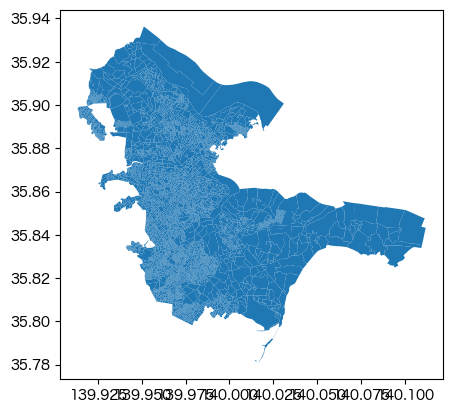

In [13]:
ax = gdf.plot()

データには既に「JINKO」のカラムがあるので、これを使ってコロプレス（choropleth）マップを作ろう。
- `column='JINKO'`
- `legend=True`

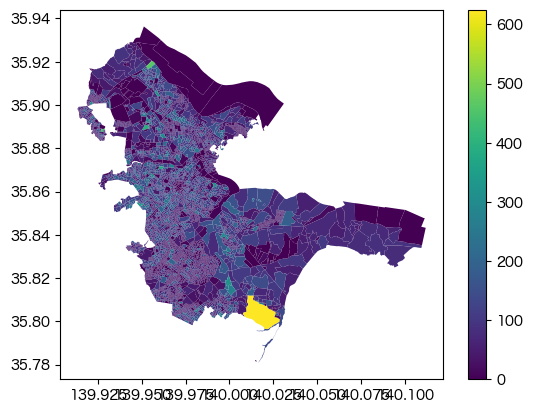

In [14]:
# population map
ax = gdf.plot(column='JINKO',
         legend=True)

## Size

マップのサイズを変更
- `figsize=(10,10)`

2 つの数字はマップの幅と高さを示しますが、マップされるデータの形状に応じてサイズが変化する可能性があります。

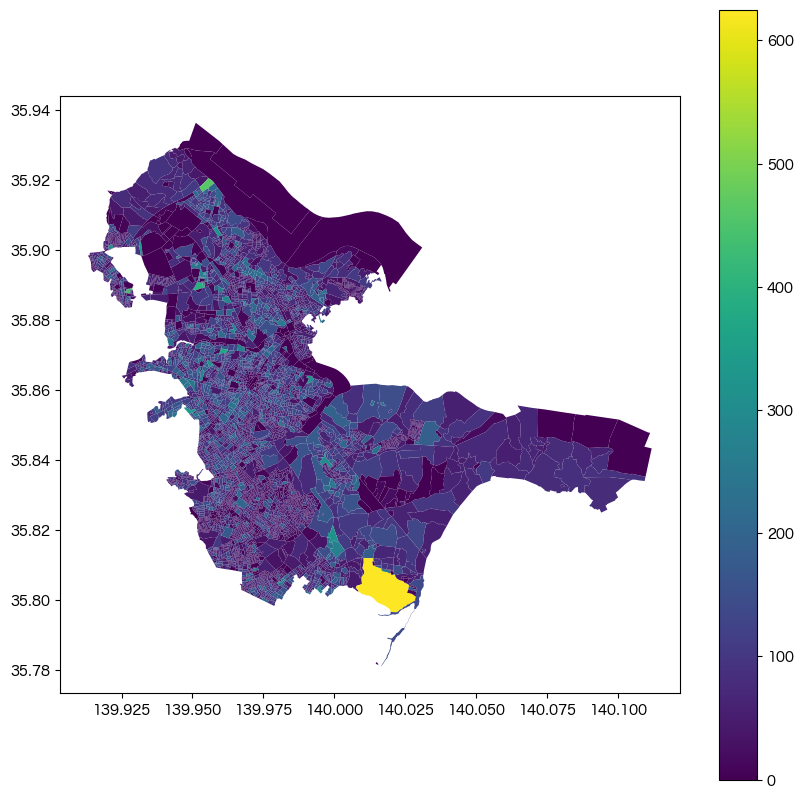

In [15]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True)

## Color

`cmap` 引数を設定して、次の選択肢からコロプレス マップのカラー パレットを割り当てることができます。なお、色の方向を変えるには `_r` を付け加えればいい。

例：　
- `cmap='autumn'`
- `cmap='autumn_r'`

<img src="images/sphx_glr_colormaps_002.webp">
<img src="images/sphx_glr_colormaps_003.webp">
<img src="images/sphx_glr_colormaps_004.webp">

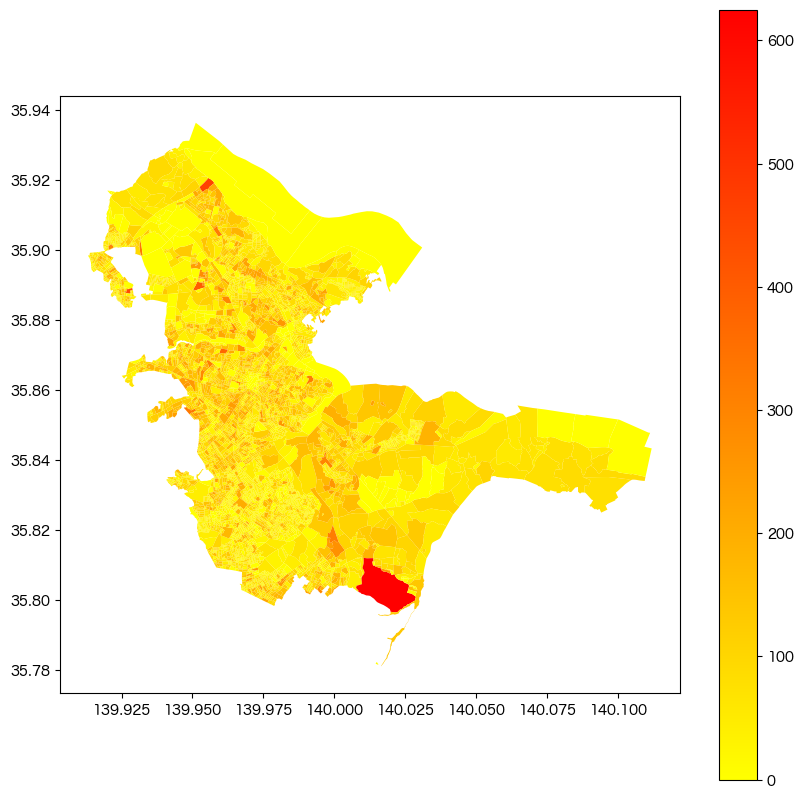

In [19]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r')

## Lines

次の引数を使用して、ポリゴンの境界線の幅と色を変更できます。

- `edgecolor='black'`
- `linewidth=0.1`

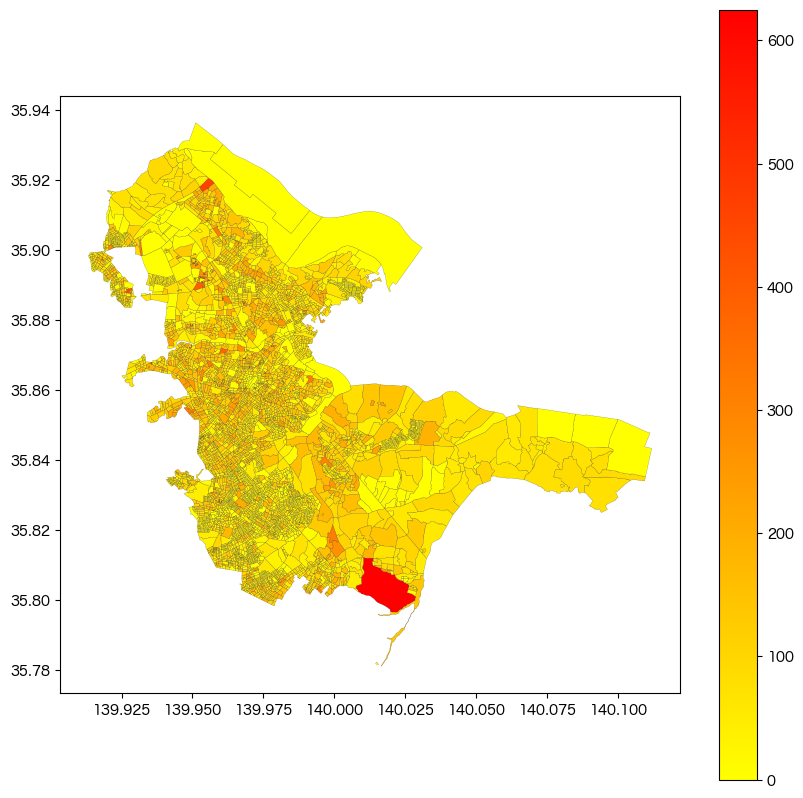

In [22]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

## Hide Axes

軸を非表示にするには、コード内に新しい行を作成し、`ax` 変数にアクセスする必要があります。

- `ax.axis('off')`


(139.9032593504561, 140.12188310351436, 35.77322493113198, 35.944078157671505)

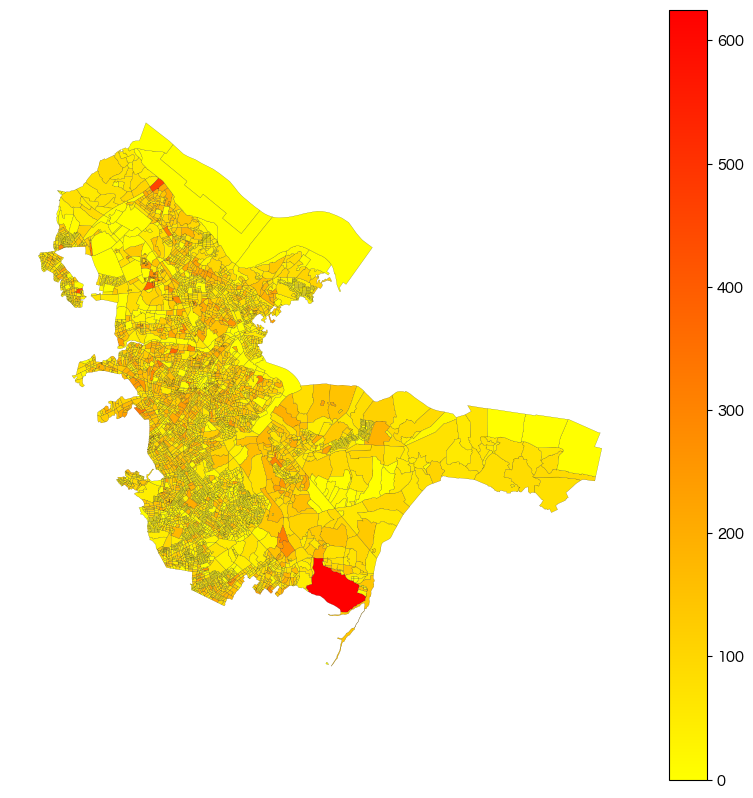

In [23]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

# hide axes
ax.axis('off')

## Title

マップのタイトルを設定するには、`ax` 変数を参照する別のコード行を追加する必要があります。

なお、日本語フォントの設定する必要があるのでMACかPCによって違うので注意：

Windows PC:
- `ax.set_title('柏市の人口',fontsize=24, fontname='MS Gothic');`

Mac:
- `ax.set_title('柏市の人口',fontsize=24, fontname='Hiragino Maru Gothic Pro');`

Text(0.5, 1.0, '柏市の人口(2020年)')

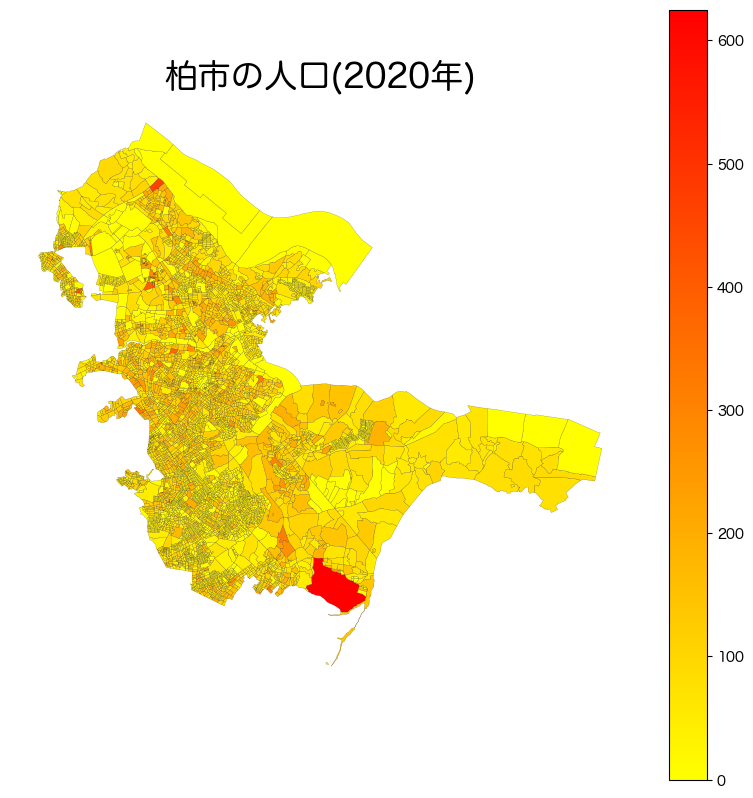

In [25]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020年)',fontsize=24)

## Basemap

ベースマップを足すには複数のステップが必要となる。

まずはベースマップを提供しているモジュール【contextily】をimportする。

In [26]:
import contextily as cx

次はデータをcontextilyがサポートしている地図投影法に変換する必要がある。

え？地図投影法とは？

## Projections

<img src="images/projections.png">

https://www.esrij.com/gis-guide/coordinate-and-spatial/coordinate-system/


https://ja.wikipedia.org/wiki/%E5%9C%B0%E5%9B%B3%E6%8A%95%E5%BD%B1%E6%B3%95%E3%81%AE%E4%B8%80%E8%A6%A7

緯度経度 (latitude,longitude) で表されているデータの地理座標系のcrs番号は `4326`だがcontextilyのベースマップは【Web メルカトル】という投影座標系を使っていて、その crs番号は `3857` である。

In [27]:
# change projection for your data to match basemap
gdf=gdf.to_crs(3857)

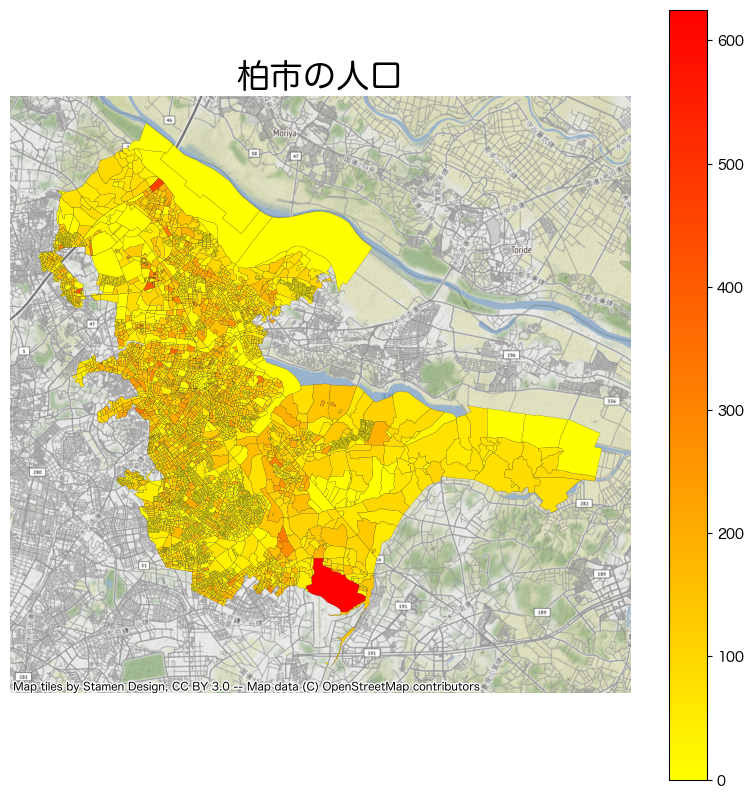

In [28]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口',fontsize=24);

# add basemap
cx.add_basemap(ax)

## Transparency

コロプレス レイヤーに少し透明度を追加して、ベースマップ上にシームレスに「浮かせる」ことができます。

- `alpha=0.8`

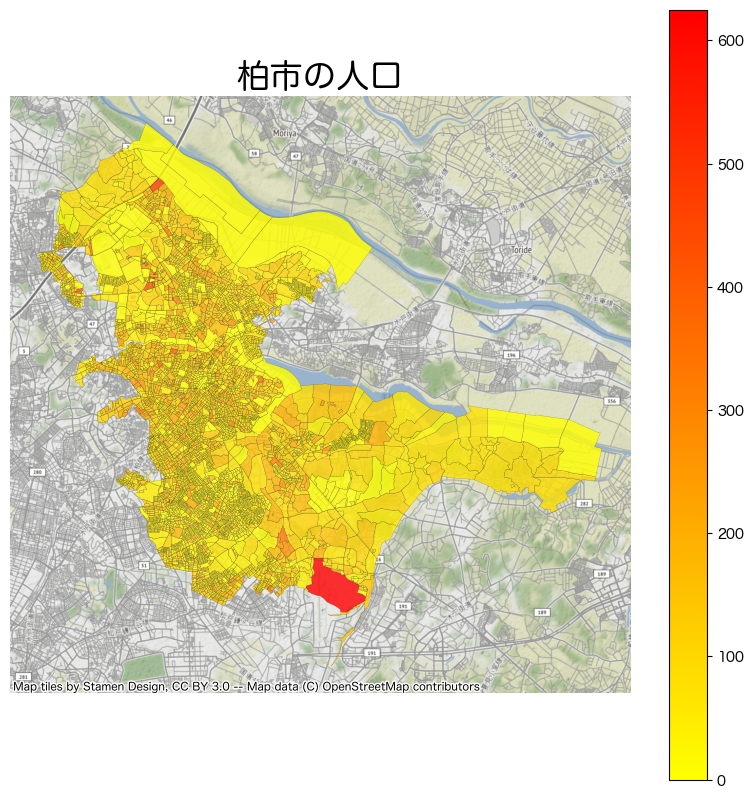

In [31]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口',fontsize=24);

# add basemap
cx.add_basemap(ax)

## Basemap options

- source=cx.providers.CartoDB.Positron
- source=cx.providers.CartoDB.DarkMatter
- source=cx.providers.Stamen.TonerLite

- source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg'
- source='https://cyberjapandata.gsi.go.jp/xyz/blank/{z}/{x}/{y}.png'

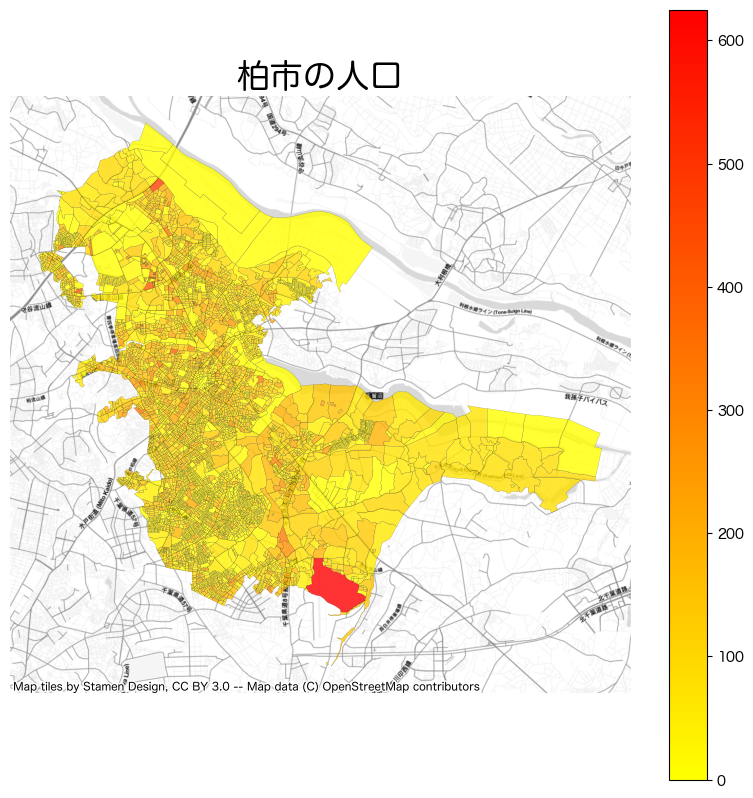

In [32]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

# Exercise

「SETAI」を示す地図を作成しましょう。 それに応じてタイトルを変更してください。 マップのさまざまな色を試してください。

In [37]:
gdf = gpd.read_file('B002005212020DDSWC17209')

In [38]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   378 non-null    object  
 1   PREF       378 non-null    object  
 2   CITY       378 non-null    object  
 3   K_AREA     378 non-null    object  
 4   S_AREA     378 non-null    object  
 5   PREF_NAME  378 non-null    object  
 6   CITY_NAME  378 non-null    object  
 7   S_NAME     378 non-null    object  
 8   KIGO_E     0 non-null      float64 
 9   HCODE      378 non-null    int64   
 10  AREA       378 non-null    float64 
 11  PERIMETER  378 non-null    float64 
 12  KIHON1     378 non-null    object  
 13  DUMMY1     378 non-null    object  
 14  KIHON2     378 non-null    object  
 15  KIHON3     378 non-null    object  
 16  C1         378 non-null    int64   
 17  C2         378 non-null    int64   
 18  DUMMY2     378 non-null    object  
 19  C3         378 non-nu

In [39]:
gdf.head()

KEY_CODE PREF CITY     K_AREA   S_AREA PREF_NAME CITY_NAME  S_NAME   
0    1720900011   17  209  012005010    00011       石川県      かほく市  宇野気（曙町  \
1  172090002101   17  209  012004010  0002101       石川県      かほく市  宇野気（栄町   
2  172090002102   17  209  012004020  0002102       石川県      かほく市  宇野気（栄町   
3  172090003101   17  209  012001030  0003101       石川県      かほく市  宇野気（大橋   
4  172090003102   17  209  012001040  0003102       石川県      かほく市  宇野気（大橋   

   KIGO_E  HCODE  ...      KEYCODE1  JINKO SETAI KEN_OLD CITY_OLD      X_CODE   
0     NaN   8101  ...  2090001-1-00    204    75      17      209  136.702247  \
1     NaN   8101  ...  2090002-1-01     64    24      17      209  136.704123   
2     NaN   8101  ...  2090002-1-02    105    47      17      209  136.705690   
3     NaN   8101  ...  2090003-1-01     42    13      17      209  136.705784   
4     NaN   8101  ...  2090003-1-02     38    15      17      209  136.704972   

      Y_CODE      KCODE1  CCODE1   
0  36.721953  0120-05010     1-1  \
1  36.721671  0120-04010  2-1- 1   
2  36.720696  0120-04020  2-1- 2   
3  36.718941  0120-01030  3-1- 1   
4  36.717642  0120-01040  3-1- 2   

                                            geometry  
0  POLYGON ((136.70307 36.72313, 136.70315 36.723...  
1  POLYGON ((136.70486 36.72178, 136.70477 36.721...  
2  POLYGON ((136.70665 36.72171, 136.70756 36.721...  
3  POLYGON ((136.70675 36.71958, 136.70639 36.718...  
4  POLYGON ((136.70579 36.71782, 136.70561 36.717...  

[5 rows x 38 columns]

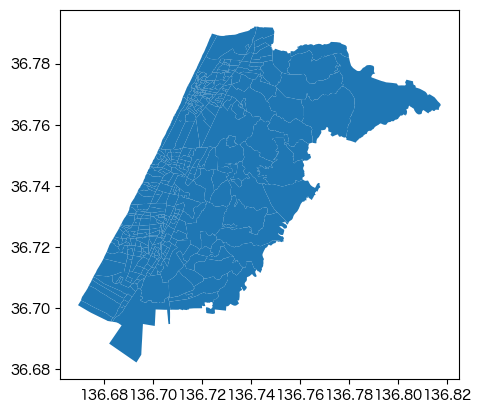

In [40]:
ax = gdf.plot()

/Users/syuakira/miniconda3/envs/gis/lib/python3.11/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


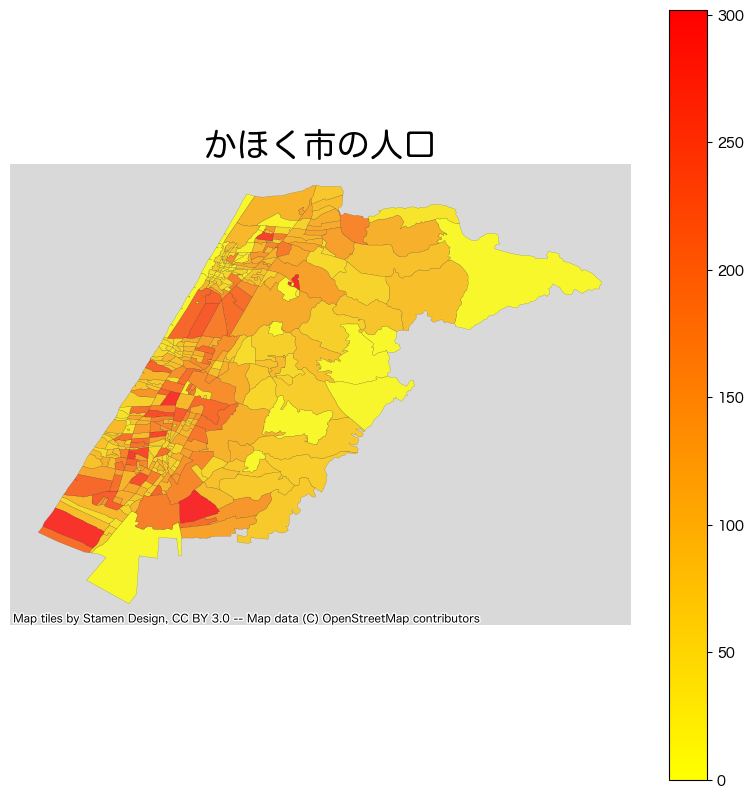

In [41]:
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('かほく市の人口',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

# 今日の課題

仮にあなたがマップ会社のインターンだとして、クライアントに「柏市で人口の最も多い街トップ10は？チャートと地図を作ってくれない？」とお願いされた。



## トップ１０を出すにはデータをソートする

データを JINKO で降順に並べ替えて、最も人口の多い町が上位に来るようにします。データフレームをソートするには

- `gdf.sort_values(by='JINKO')`

多い数字を上にするには

- `gdf.sort_values(by='JINKO' ascending=False)`


In [42]:
gdf = gdf.sort_values(by='JINKO', ascending=False )
gdf

KEY_CODE PREF CITY     K_AREA   S_AREA PREF_NAME CITY_NAME S_NAME   
54   172090036102   17  209  003000020  0036102       石川県      かほく市    狩鹿野  \
363  172090223401   17  209  029000021  0223401       石川県      かほく市    内高松   
86     1720900581   17  209  014000110    00581       石川県      かほく市     大崎   
179    1720901231   17  209  023000040    01231       石川県      かほく市     遠塚   
153    1720901011   17  209  027000040    01011       石川県      かほく市     白尾   
..            ...  ...  ...        ...      ...       ...       ...    ...   
92   172090062103   17  209  011000072  0062103       石川県      かほく市     七窪   
42     1720900283   17  209  006000011    00283       石川県      かほく市     気屋   
46     1720900313   17  209  008000011    00313       石川県      かほく市    下山田   
57     1720900392   17  209  020000010    00392       石川県      かほく市     湖北   
377    1720902332   17  209  041000010    02332       石川県      かほく市     野寺   

     KIGO_E  HCODE  ...      KEYCODE1  JINKO SETAI KEN_OLD CITY_OLD   
54      NaN   8101  ...  2090036-1-02    302    90      17      209  \
363     NaN   8101  ...  2090223-4-01    299     4      17      209   
86      NaN   8101  ...  2090058-1-00    291    95      17      209   
179     NaN   8101  ...  2090123-1-00    287    96      17      209   
153     NaN   8101  ...  2090101-1-00    274    82      17      209   
..      ...    ...  ...           ...    ...   ...     ...      ...   
92      NaN   8101  ...  2090062-1-03      0     0      17      209   
42      NaN   8101  ...  2090028-3-00      0     0      17      209   
46      NaN   8101  ...  2090031-3-00      0     0      17      209   
57      NaN   8101  ...  2090039-2-00      0     0      17      209   
377     NaN   8101  ...  2090233-2-00      0     0      17      209   

         X_CODE     Y_CODE      KCODE1    CCODE1   
54   136.711287  36.707692  0030-00020   36-1- 2  \
363  136.737169  36.766547  0290-00021  223-4- 1   
86   136.678195  36.702114  0140-00110      58-1   
179  136.704491  36.736276  0230-00040     123-1   
153  136.693997  36.721321  0270-00040     101-1   
..          ...        ...         ...       ...   
92   136.708535  36.730043  0110-00072   62-1- 3   
42   136.737504  36.730508  0060-00011      28-3   
46   136.725604  36.719584  0080-00011      31-3   
57   136.691466  36.694394  0200-00010      39-2   
377  136.798517  36.768886  0410-00010     233-2   

                                              geometry  
54   POLYGON ((136.71659 36.70700, 136.71695 36.706...  
363  POLYGON ((136.73606 36.76656, 136.73596 36.766...  
86   POLYGON ((136.68673 36.70118, 136.68663 36.700...  
179  POLYGON ((136.70672 36.73750, 136.70642 36.736...  
153  POLYGON ((136.69517 36.72159, 136.69497 36.721...  
..                                                 ...  
92   POLYGON ((136.70818 36.73000, 136.70845 36.730...  
42   POLYGON ((136.74593 36.73039, 136.74592 36.730...  
46   POLYGON ((136.72821 36.72213, 136.72820 36.721...  
57   POLYGON ((136.70617 36.70363, 136.70655 36.702...  
377  POLYGON ((136.78000 36.78199, 136.78013 36.781...  

[378 rows x 38 columns]

In [43]:
# show top 10
gdf.head(10)

KEY_CODE PREF CITY     K_AREA   S_AREA PREF_NAME CITY_NAME  S_NAME   
54   172090036102   17  209  003000020  0036102       石川県      かほく市     狩鹿野  \
363  172090223401   17  209  029000021  0223401       石川県      かほく市     内高松   
86     1720900581   17  209  014000110    00581       石川県      かほく市      大崎   
179    1720901231   17  209  023000040    01231       石川県      かほく市      遠塚   
153    1720901011   17  209  027000040    01011       石川県      かほく市      白尾   
341    1720902071   17  209  042004010    02071       石川県      かほく市  学園台四丁目   
136    1720900901   17  209  026000010    00901       石川県      かほく市     外日角   
157    1720901041   17  209  027000030    01041       石川県      かほく市      白尾   
190    1720901301   17  209  024000060    01301       石川県      かほく市      浜北   
59     1720900411   17  209  013000020    00411       石川県      かほく市     内日角   

     KIGO_E  HCODE  ...      KEYCODE1  JINKO SETAI KEN_OLD CITY_OLD   
54      NaN   8101  ...  2090036-1-02    302    90      17      209  \
363     NaN   8101  ...  2090223-4-01    299     4      17      209   
86      NaN   8101  ...  2090058-1-00    291    95      17      209   
179     NaN   8101  ...  2090123-1-00    287    96      17      209   
153     NaN   8101  ...  2090101-1-00    274    82      17      209   
341     NaN   8101  ...  2090207-1-00    268    73      17      209   
136     NaN   8101  ...  2090090-1-00    263    83      17      209   
157     NaN   8101  ...  2090104-1-00    257    93      17      209   
190     NaN   8101  ...  2090130-1-00    252    91      17      209   
59      NaN   8101  ...  2090041-1-00    251   105      17      209   

         X_CODE     Y_CODE      KCODE1    CCODE1   
54   136.711287  36.707692  0030-00020   36-1- 2  \
363  136.737169  36.766547  0290-00021  223-4- 1   
86   136.678195  36.702114  0140-00110      58-1   
179  136.704491  36.736276  0230-00040     123-1   
153  136.693997  36.721321  0270-00040     101-1   
341  136.729150  36.778934  0420-04010     207-1   
136  136.700801  36.726790  0260-00010      90-1   
157  136.696369  36.721827  0270-00030     104-1   
190  136.701459  36.732180  0240-00060     130-1   
59   136.695777  36.714873  0130-00020      41-1   

                                              geometry  
54   POLYGON ((136.71659 36.70700, 136.71695 36.706...  
363  POLYGON ((136.73606 36.76656, 136.73596 36.766...  
86   POLYGON ((136.68673 36.70118, 136.68663 36.700...  
179  POLYGON ((136.70672 36.73750, 136.70642 36.736...  
153  POLYGON ((136.69517 36.72159, 136.69497 36.721...  
341  POLYGON ((136.72883 36.77979, 136.72890 36.779...  
136  POLYGON ((136.70330 36.72742, 136.70325 36.727...  
157  POLYGON ((136.69841 36.72335, 136.69838 36.722...  
190  POLYGON ((136.70520 36.73239, 136.70519 36.732...  
59   POLYGON ((136.69833 36.71574, 136.69796 36.715...  

[10 rows x 38 columns]

## Make the chart

Week08のラボを参照して作る。

In [48]:
fig = px.bar(gdf.head(10),
            y='JINKO',
            x='S_NAME',
            template='seaborn' # change this to see other styles
            )

fig.show()

## Map

同じように、トップ１０マップを作るには `gef.head(10)` を付け加えればいい。

/Users/syuakira/miniconda3/envs/gis/lib/python3.11/site-packages/contextily/tile.py:581: UserWarning:

The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).



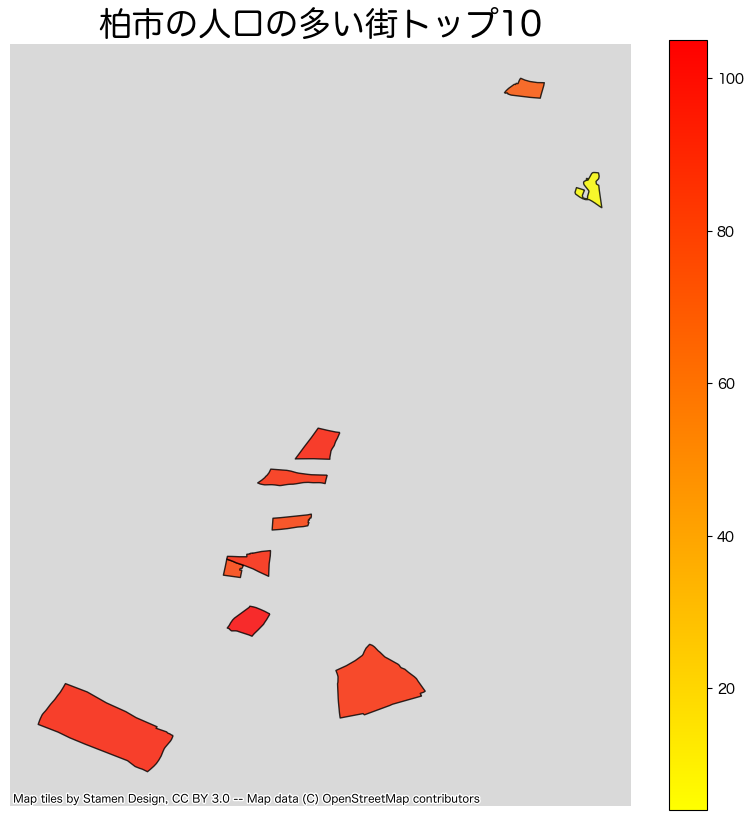

In [47]:
# population map
ax = gdf.head(10).plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=1,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口の多い街トップ10',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

# Exercise

「SETAI」を示すトップ１０チャートと地図を作成しましょう。 それに応じてタイトルを変更してください。 マップのさまざまな色を試してください。